In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting import fig_saver
import gas_phase_data

/home/daniel/surp/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import sys
sys.path.append("../")
import surp

In [7]:
mc = ModelComparer(["c11_isotopic"], isotopic=True)

# Mean abundance star tracks

saving


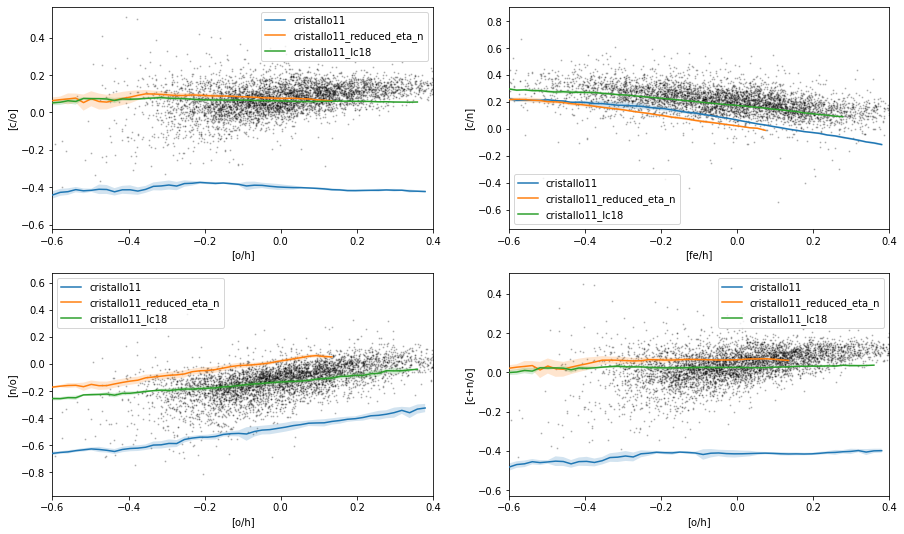

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [35]:
# mc.plot_all_mean_stars(filename="stars_eta")

# Gas phase tracks

In [20]:
import pandas as pd

In [29]:
import vice

In [96]:
def plot_isotope(name):
    model = vice.output(name)
    R = np.arange(3, 12, 0.1)
    c12 = [model.zones["zone%i" % int(i)].history["z(au)"][-1] for i in 10*R]
    c13 = [model.zones["zone%i" % int(i)].history["z(ag)"][-1] for i in 10*R]
    M_h = [model.zones["zone%i" % int(i)].history["[M/h]"][-1] for i in 10*R]
    plt.plot(R, np.array(c12)/c13, label=name)


In [100]:
model = vice.output("output/c11_isotopic")
model = vice.output("output/c11_isotopic_lateburst")

In [101]:
i = 70
t = model.zones["zone%i" % i].history["time"]
c12 = model.zones["zone%i" % i].history["z(au)"]
c13 = model.zones["zone%i" % i].history["z(ag)"]

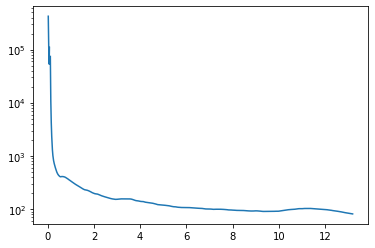

In [107]:
plt.plot(t, np.array(c12)/c13)
plt.yscale("log")
#plt.xscale("log")

In [91]:
import numpy as np

In [93]:
R = np.arange(3, 12, 0.1)
c12 = [model.zones["zone%i" % int(i)].history["z(au)"][-1] for i in 10*R]
c13 = [model.zones["zone%i" % int(i)].history["z(ag)"][-1] for i in 10*R]
M_h = [model.zones["zone%i" % int(i)].history["[M/h]"][-1] for i in 10*R]

<ErrorbarContainer object of 3 artists>

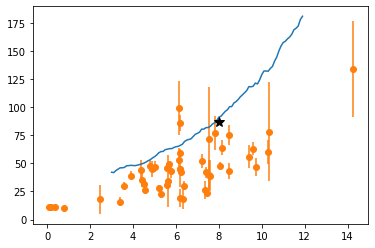

In [95]:
plt.plot(8, 87, "*k", markersize=10, zorder=5)
plt.plot(R, np.array(c12)/c13)
obs = pd.read_csv("yan_19.txt", sep="\s+", skiprows=1)
plt.errorbar(obs["R_gal"], obs["C12_C13"], yerr=obs["Error"], fmt="o")


Text(0, 0.5, 'c12/c13')

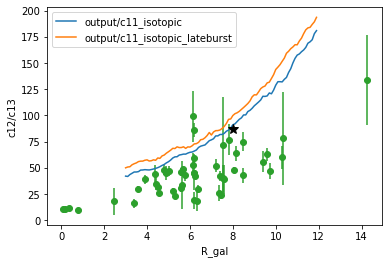

In [99]:
plot_isotope("output/c11_isotopic")
plot_isotope("output/c11_isotopic_lateburst")
obs = pd.read_csv("yan_19.txt", sep="\s+", skiprows=1)
plt.errorbar(obs["R_gal"], obs["C12_C13"], yerr=obs["Error"], fmt="o")
plt.plot(8, 87, "*k", markersize=10, zorder=5)
plt.legend()
plt.xlabel("R_gal")
plt.ylabel("c12/c13")

# MDFs

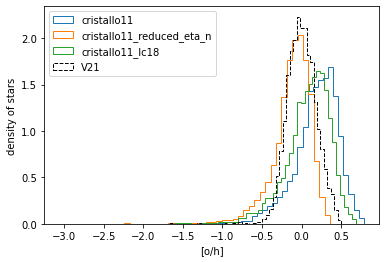

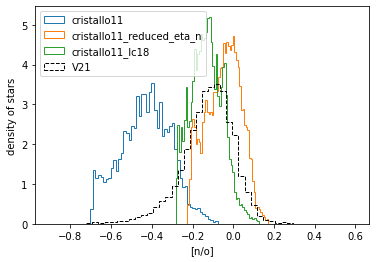

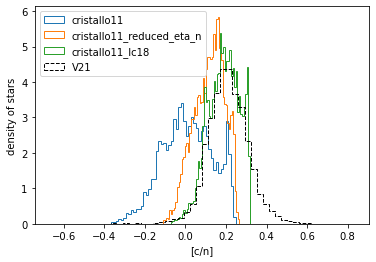

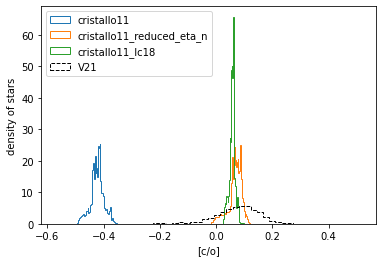

In [8]:
mc.plot_mdf("[o/h]")
mc.plot_mdf("[n/o]")
mc.plot_mdf("[c/n]")
mc.plot_mdf("[c/o]")

# Stars

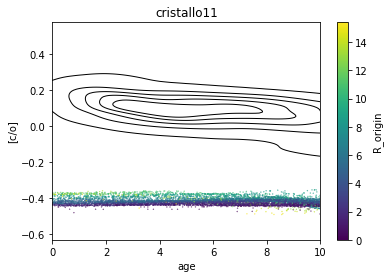

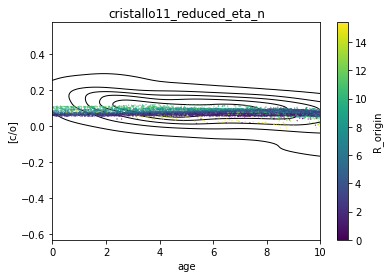

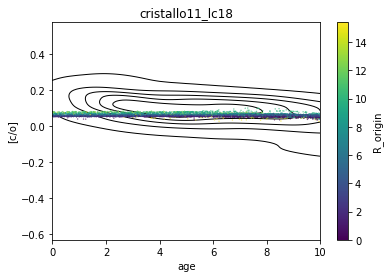

In [9]:
mc.plot_stars("age", "[c/o]", c="R_origin", xlim=(0, 10))

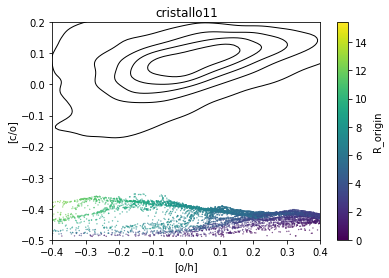

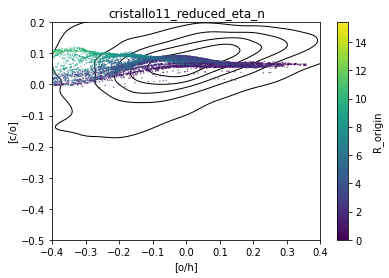

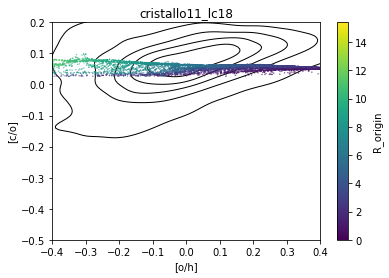

In [10]:
mc.plot_stars("[o/h]", "[c/o]", c="R_origin", xlim=(-0.4, 0.4), ylim=(-0.5, 0.2))

# Gas phase tracks

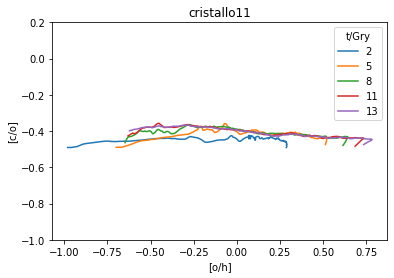

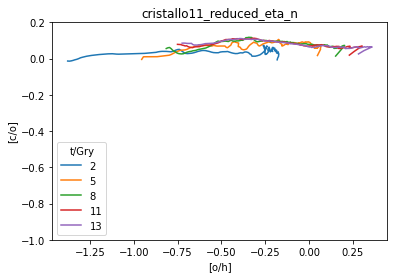

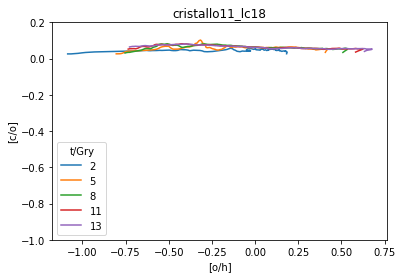

In [11]:
mc.plot_model_fixed_t(ylim=(-1, 0.2))

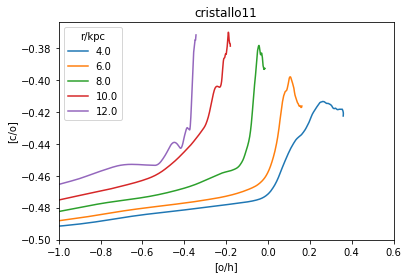

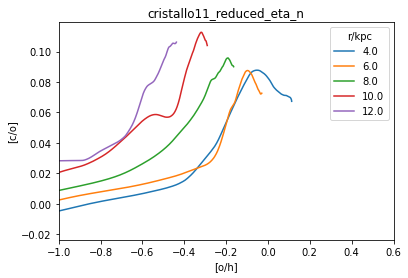

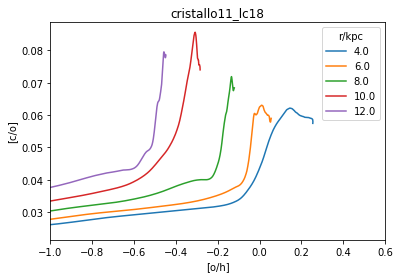

In [12]:
mc.plot_model_fixed_r()